# Kaggle Competition - House Prices | For Beginners

This Notebook will break down beginner concepts of completing the House Prices competition. 

### Bring in your Imports
Many of these imports are necessary among 100% of all data science projects, and some vary based on the problem and the way you are completing the project

In [1]:
# Essentials
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Stats
from scipy.stats import skew, norm

# Models
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet

# Miscellaneous
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline

pd.set_option('display.max_columns', None)
sns.set()

# Warnings
import warnings
warnings.filterwarnings(action="ignore")

### Exploratory Data Analysis
EDA is an approach to analyzing datasets to summarize their main characteristics, often used with visuals methods. EDA is used for seeing what the data can tell us before the modeling task. It provides us an easier visual of finding patterns and relations between the datasets instead of just looking at columns and numbers.
- **(1/3) - Load the Data**
- **(2/3) - Look at the Target Variable**
- **(3/3) - Look at the Feature Correlations**

##### (1/3) - Load the Data
Load the data, check the shapes (meaning amount of inputs and features), and check for duplicates.

In [2]:
# Loading the training and testing data
train = pd.read_csv('data_folder/train.csv')
test = pd.read_csv('data_folder/test.csv')
# Find number of inputs and features for the two datasets
print(f'There are {train.shape[0]} inputs and {train.shape[1]} features for the training data')
print(f'There are {test.shape[0]} inputs and {test.shape[1]} features for the testing data')

There are 1460 inputs and 81 features for the training data
There are 1459 inputs and 80 features for the testing data


In [3]:
# Check for duplicates in train data
train_idUnique = len(set(train.Id))
train_idTotal = train.shape[0]
train_idDupli = train_idTotal - train_idUnique
print(f'There are {str(train_idDupli)} duplicate IDs for the training data.')
# Check for duplicates in test data
test_idUnique = len(set(test.Id))
test_idTotal = test.shape[0]
test_idDupli = test_idTotal - test_idUnique
print(f'There are {str(test_idDupli)} duplicate IDs for the testing data.')

There are 0 duplicate IDs for the training data.
There are 0 duplicate IDs for the testing data.


Preview the data by familiarizing yourself with the type of data (categorical and numerical) and the columns.

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


From looking at all the columns (and reading the objective of the project) we can understand the target feature is 'SalePrice'.

##### (2/3) - Look at the Target Variable
Isolate the variable we are trying to predict by looking at it as a histogram and QQ plot with skewness and kurtosis. 

In [6]:
# Descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

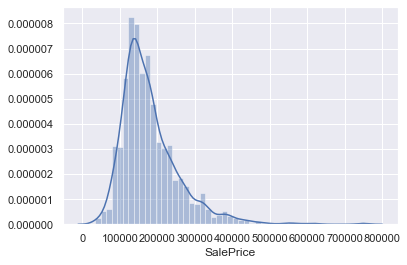

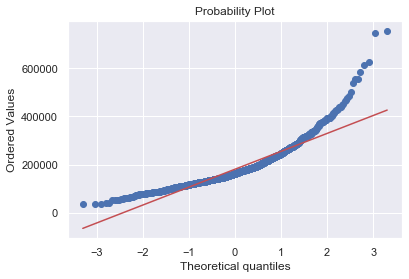

In [7]:
# Histogram
sns.distplot(train['SalePrice'])

# QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The 'SalePrice' has a positive skew which means trouble for any model because models don't perform well when data is not normally distributed. Soon we will apply the log transformation to fix it. 

In [8]:
# Find the skewness and kurtosis values
print('Skewness: %f' % train['SalePrice'].skew())
print('Kurtosis: %f' % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- If skewness is < -1 or > 1, the distribution is highly skewed
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderatly skewed
- If skewness is between -0.5 and 0.5, the distribution is approximatly symmetric




- If kurtosis is 3, it is a normal distribution
- If kurtosis is > 3, it has a strong peak, more rapid decay, and heavier tails
- If kurtosis is < 3, it has lighter tails that are less extreme compared to a normal distribution

##### (3/3) - Look at the Feature Correlations
Start looking into the features of the train data set and find which properties of a house most affect the 'SalePrice'.

In [9]:
# Find most important features relative to the target
print('Find most important features relative to target')
corr = train.corr()
corr.sort_values(['SalePrice'], ascending = False, inplace=True)
print(corr.SalePrice[:10])

Find most important features relative to target
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


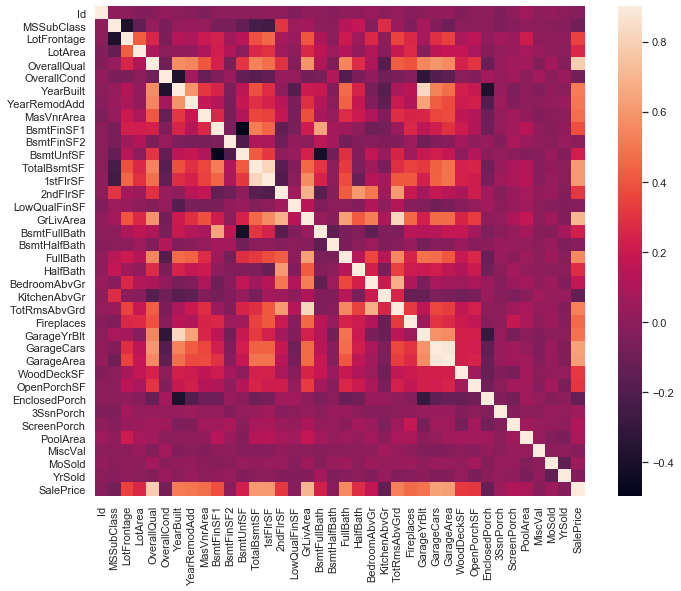

In [10]:
# Correlation heatmap to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Noticing **Multicollinearity** in the heatmap now, You can see how 'GarageCars' and 'GarageArea' are highly correlated with eachother which is represented by the light squares when the two axis meet. Same as 'TotalBsmtSF and 1stFlrSF' and lastly 'TotRmsAbvGrd' and 'GrLivArea'. For now, we will only include one of the three sets of multicollinearity we spotted for the visualizations of the features in the scatterplots below.

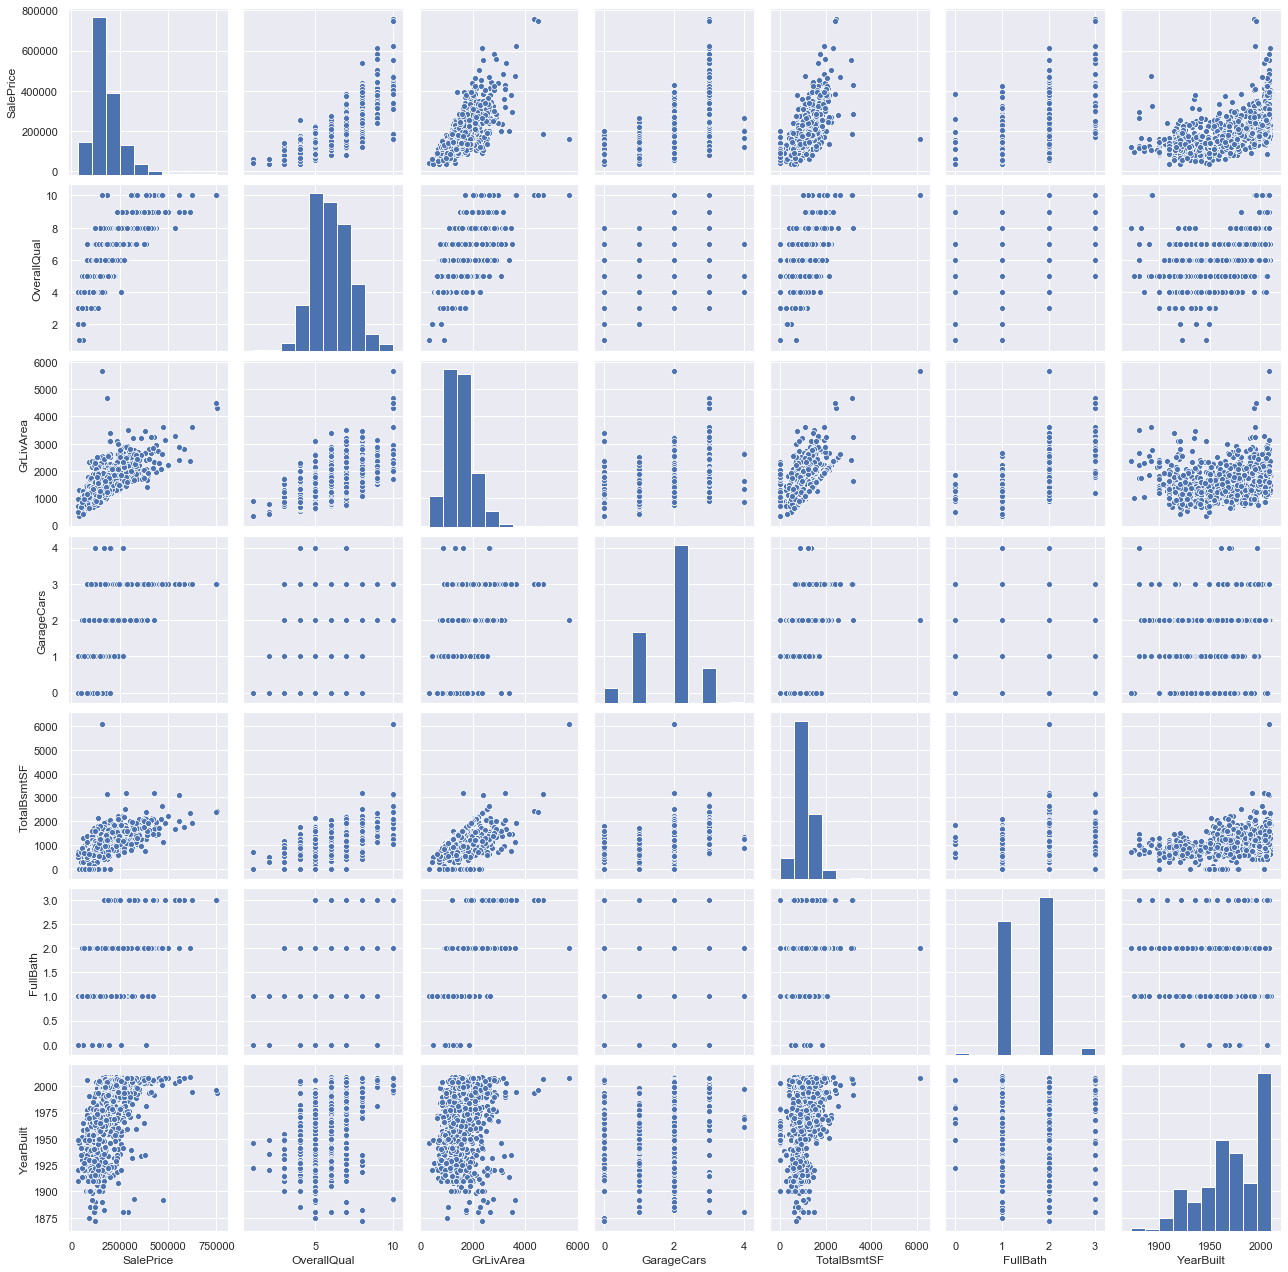

In [11]:
# Create scatterplots of a few of the most correlated features in relation to 'SalePrice'
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

### Data Manipulation
Once we got an understanding of the data we are working with, we can now move onto data manipulation which is removing outliers and filling in missing inputs.
- **(1/5) - Looking for Outliers**
- **(2/5) - Removing the Outliers**
- **(3/5) - Log Transformation on Target Variable**
- **(4/5) - Combining the Data**
- **(5/5) - Identifying and Filling in Missing Values**

We start by removing the 'Id' column because they are all unique and provide no effectiveness to a model.

In [12]:
# Remove 'Id' from train and test set.
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1460, 80), (1459, 79))

##### (1/5) - Looking for Outliers
Outliers can negatively affect aan algoritm when the data is being applied to a model. Only the obvious outliers should be removed without taking to many data points away.

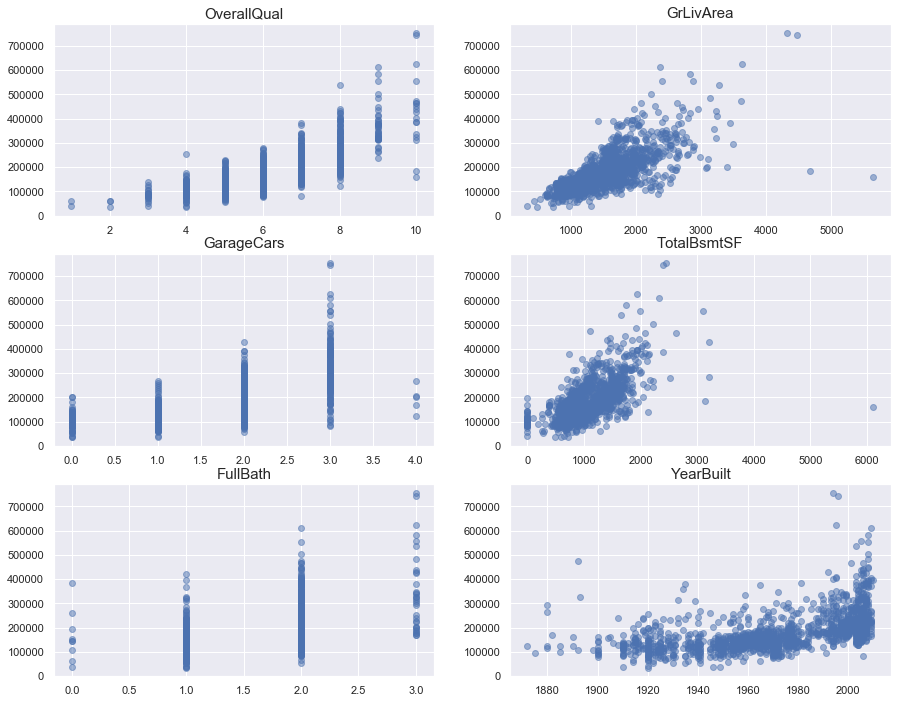

In [13]:
# Plot the scatterplots from before on a larger scale, looking for possible outliers. 
fig = plt.figure(figsize=(15,12))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=train['OverallQual'], y=train['SalePrice'], alpha=0.5)
plt.title('OverallQual', fontsize=15)

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'], alpha=0.5)
plt.title('GrLivArea', fontsize=15)

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=train['GarageCars'], y=train['SalePrice'], alpha=0.5)
plt.title('GarageCars', fontsize=15)

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=train['TotalBsmtSF'], y=train['SalePrice'], alpha=0.5)
plt.title('TotalBsmtSF', fontsize=15)

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=train['FullBath'], y=train['SalePrice'], alpha=0.5)
plt.title('FullBath', fontsize=15)

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=train['YearBuilt'], y=train['SalePrice'], alpha=0.5)
plt.title('YearBuilt', fontsize=15)
plt.show()

There is three outliers that stick out; 
- The *two* data points in GrLivArea that are > 4000 and < 200000 
- The *one* data point in TotalBsmtSF that is > 6000

##### (2/5) - Removing the Outliers

In [14]:
# Identify the outliers mentioned
train['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [15]:
train['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

We can see that two of the outliers are from the same row, so we will be dropping only two rows in total. 

In [16]:
# Remove the outliers
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['TotalBsmtSF']>5000) & (train['SalePrice']<200000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

# Check to make sure the two rows were removed from training data
train.shape

(1458, 80)

###### (3/5) - Log Transformation on Target Variable
Now we will go back to the target variable 'SalePrice' and fix the skewness.

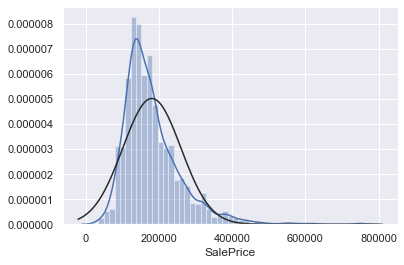

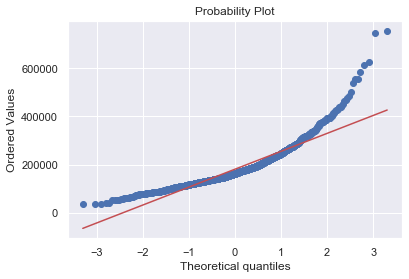

In [17]:
# Histogram and normal probability plot for 'SalePrice'
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Apply the log transformation.

In [18]:
# Applying log transformation.
train['SalePrice'] = np.log1p(train['SalePrice'])

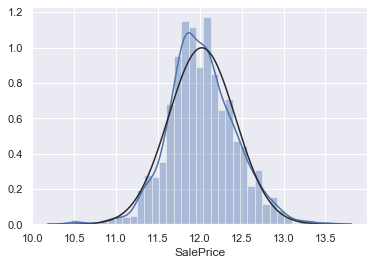

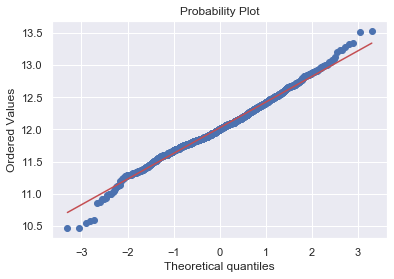

In [19]:
# Transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Now 'SalePrice' is normalized and in a lot better condition for the model.

##### (4/5) - Combining the Data
We have gotten rid of some obvious outliers and now we are going to combine the training and testing data so all feature engineering will be done to both datasets at the same time instead of each one seperately.

In [20]:
# Set y variable for later and drop SalePrice
y_train = train.SalePrice.values
train_data = train.drop(['SalePrice'], axis=1)
test_data = test
# Combine the data
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)
all_data.shape

(2917, 79)

##### (5/5) - Identifying and Filling in Missing Values
Lets take all the data now and split it into categorical and numerical sections to help with filling in the missing data.

In [21]:
# Group variables into Numerical and Categorical features
categorical_features = all_data.select_dtypes(include = ["object"]).columns
numerical_features = all_data.select_dtypes(exclude = ["object"]).columns
print(f'There are {str(len(numerical_features))} Numerical features')
print(f'There are {str(len(categorical_features))} Categorical features')

There are 36 Numerical features
There are 43 Categorical features


The reason we seperate the data into numerical and categorical is for when we are filling in the missing data, we can use *median* to fill in the missing values for numerical inputs and *mode* to fill in the categorical missing inputs.

In [22]:
# Showcase the missing numerical values
missing_numerical = (all_data[numerical_features].isnull().sum()
                     /all_data[numerical_features].isnull().count()).sort_values(ascending=False)
missing_numerical = missing_numerical[missing_numerical > 0] * 100
print(f'There are {missing_numerical.shape[0]} numerical features with missing values')
missing_numerical = pd.DataFrame({'% Missing' :missing_numerical})
missing_numerical.head(11)

There are 11 numerical features with missing values


,% Missing
LotFrontage,16.660953
GarageYrBlt,5.450806
MasVnrArea,0.788481
BsmtHalfBath,0.068564
BsmtFullBath,0.068564
GarageArea,0.034282
BsmtFinSF1,0.034282
BsmtFinSF2,0.034282
BsmtUnfSF,0.034282
TotalBsmtSF,0.034282


- LotFrontage and GarageYearBlt will be filled with median values of the neighbourhood to keep original distribution as much as possible. 
- Other variables with less than 1% missing data will be filled with zero.
1 / 2919 = 0.034258, meaning those percentages mean just a single input is missing.

In [23]:
# Check one of the single missing inputs
np.where(pd.isnull(all_data.GarageArea))

(array([2574], dtype=int64),)

In [24]:
# See what else that single input is missing
all_data.loc[2574].isnull().sort_values(ascending=False).head(11)

FireplaceQu      True
GarageCond       True
MiscFeature      True
PoolQC           True
Alley            True
GarageYrBlt      True
GarageFinish     True
GarageCars       True
GarageArea       True
GarageQual       True
YearRemodAdd    False
Name: 2574, dtype: bool

Index no. 2574 has no 'GarageArea', 'GarageCars' and also no 'GarageYrBlt' which means GarageYrBlt for index no. 2574 will be filled with zero. All the remaining features with missing variables we will assume are missing because the house doesn't have it, so we will fill with 0.

In [25]:
# Check a different single missing input
np.where(pd.isnull(all_data.BsmtFinSF1))

(array([2118], dtype=int64),)

In [26]:
# See what else that single input is missing
all_data.loc[2118].isnull().sort_values(ascending=False).head(16)

BsmtUnfSF        True
Alley            True
BsmtHalfBath     True
BsmtFullBath     True
BsmtFinSF2       True
FireplaceQu      True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
PoolQC           True
BsmtFinType1     True
MiscFeature      True
BsmtFinSF1       True
BsmtFinType2     True
TotalBsmtSF      True
MasVnrType      False
Name: 2118, dtype: bool

Index no. 2118 has no Basement qualities whatsoever so we will fill with 0 including for BsmtHalfBath and BsmtFullBath. 

In [27]:
# Fill missing values for numerical
all_data['LotFrontage'] = all_data.groupby(['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))
all_data.at[2574, 'GarageYrBlt'] = 0
all_data['GarageYrBlt'] = all_data.groupby(['Neighborhood'])['GarageYrBlt'].apply(lambda x: x.fillna(x.median()))
all_data.at[2118, 'BsmtHalfBath'] = 0
all_data.at[2118, 'BsmtFullBath'] = 0
for col in ['MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'GarageCars']:
    all_data[col] = all_data[col].fillna(0)

In [28]:
# Showcase the missing categorical values
missing_categorical = (all_data[categorical_features].isnull().sum()
                     /all_data[categorical_features].isnull().count()).sort_values(ascending=False)
missing_categorical = missing_categorical[missing_categorical > 0] * 100
print(f'There are {missing_categorical.shape[0]} categorical features with missing values')
missing_categorical = pd.DataFrame({'% Missing' :missing_categorical})
missing_categorical.head(23)

There are 23 categorical features with missing values


,% Missing
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
GarageCond,5.450806
GarageQual,5.450806
GarageFinish,5.450806
GarageType,5.382242
BsmtCond,2.811107


The top 4 features with > 50% missing data will be dropped. Some features have NA listed on their property meaning Not Available, we will fill those features with None, while other features that are missing with no description will be filled with the mode.

In [29]:
# drop values with > 50% missing data
all_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

# fill missing values for categorical
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0], inplace=True)
all_data['Utilities'].fillna(all_data['Utilities'].mode()[0], inplace=True)
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0], inplace=True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0], inplace=True)
all_data['MasVnrType'].fillna(all_data['MasVnrType'].mode()[0], inplace=True)
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0], inplace=True)
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0], inplace=True)
all_data['Functional'].fillna(all_data['Functional'].mode()[0], inplace=True)
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0], inplace=True)
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
           'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')

In [30]:
# Double check shape to some rows were removed and to ensure all variables have values now
all_data.shape, all_data.isnull().any().sum()

((2917, 75), 0)

This shows we now have 2917 total rows, 75 features still and have 0 missing values.

### Feature Engineering
This is where you have your data cleaned out and understand what you are working with, now we will modify the features to improve the model.
- **(1/4) - Change Types for some Data Values**
- **(2/4) - Treat Skewed Numeric Features**
- **(3/4) - Dummy Variables**
- **(4/4) - Recreate Training and Testing Sets**

##### (1/4) - Change Types for some Data Values
Features stored with numerics will need to be switched to strings to the model doesn't interpret them as a value.

In [31]:
# Stored as numerics but need to be converted into strings
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['MSSubClass'].dtype, all_data['YrSold'].dtype, all_data['MoSold'].dtype

(dtype('O'), dtype('O'), dtype('O'))

Features that have ordinal data (meaning a ranking) will need to be switched to numeric values. 

Looking at the data_description.txt, we are looking at which values have a ranking value set up in classifications. We will need to turn those classifications into numerics while still holding the same ranking value.

In [32]:
all_data['ExterQual'].value_counts(), all_data['ExterCond'].value_counts()

(TA    1798
 Gd     979
 Ex     105
 Fa      35
 Name: ExterQual, dtype: int64,
 TA    2536
 Gd     299
 Fa      67
 Ex      12
 Po       3
 Name: ExterCond, dtype: int64)

In [33]:
all_data['BsmtQual'].value_counts(), all_data['BsmtCond'].value_counts(), all_data['BsmtExposure'].value_counts()

(TA      1283
 Gd      1209
 Ex       256
 Fa        88
 None      81
 Name: BsmtQual, dtype: int64,
 TA      2604
 Gd       122
 Fa       104
 None      82
 Po         5
 Name: BsmtCond, dtype: int64,
 No      1904
 Av       418
 Gd       274
 Mn       239
 None      82
 Name: BsmtExposure, dtype: int64)

In [34]:
all_data['BsmtFinType1'].value_counts(), all_data['BsmtFinType2'].value_counts()

(Unf     851
 GLQ     847
 ALQ     429
 Rec     288
 BLQ     269
 LwQ     154
 None     79
 Name: BsmtFinType1, dtype: int64,
 Unf     2491
 Rec      105
 LwQ       87
 None      80
 BLQ       68
 ALQ       52
 GLQ       34
 Name: BsmtFinType2, dtype: int64)

In [35]:
all_data['HeatingQC'].value_counts()

Ex    1491
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [36]:
all_data['KitchenQual'].value_counts()

TA    1493
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [37]:
all_data['FireplaceQu'].value_counts()

None    1420
Gd       742
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [38]:
all_data['GarageQual'].value_counts(), all_data['GarageCond'].value_counts()

(TA      2602
 None     159
 Fa       124
 Gd        24
 Po         5
 Ex         3
 Name: GarageQual, dtype: int64,
 TA      2652
 None     159
 Fa        74
 Gd        15
 Po        14
 Ex         3
 Name: GarageCond, dtype: int64)

When changing the values, it was in the data_description.txt in the workbook that values like 1 meant poor and 10 meant excellent, so we want to make sure we keep that same process where the high number means best. 

In [39]:
# Change ordinal data into numeric values
all_data['ExterQual'].replace(['Fa','TA','Gd','Ex'],[1,2,3,4], inplace=True)
all_data['ExterCond'].replace(['Po','Fa','TA','Gd','Ex'],[1,2,3,4,5], inplace=True)
all_data['BsmtQual'].replace(['None','Fa','TA','Gd','Ex'],[1,2,3,4,5], inplace=True)
all_data['BsmtCond'].replace(['None','Po','Fa','TA','Gd'],[1,2,3,4,5], inplace=True)
all_data['BsmtExposure'].replace(['None','No','Mn','Av','Gd'],[1,2,3,4,5], inplace=True)
all_data['BsmtFinType1'].replace(['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[1,2,3,4,5,6,7], inplace=True)
all_data['BsmtFinType2'].replace(['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[1,2,3,4,5,6,7], inplace=True)
all_data['HeatingQC'].replace(['Po','Fa','TA','Gd','Ex'],[1,2,3,4,5], inplace=True)
all_data['KitchenQual'].replace(['Po','Fa','TA','Gd','Ex'],[1,2,3,4,5], inplace=True)
all_data['FireplaceQu'].replace(['None','Po','Fa','TA','Gd','Ex'],[1,2,3,4,5,6], inplace=True)
all_data['GarageQual'].replace(['None','Po','Fa','TA','Gd','Ex'],[1,2,3,4,5,6], inplace=True)
all_data['GarageCond'].replace(['None','Po','Fa','TA','Gd','Ex'],[1,2,3,4,5,6], inplace=True)

##### (2/4) - Treat Skewed Numeric Features
By fixing the skewness we are helping the features to be converted into a normal distribution. We are calling a new variable to include all the differences that we just did to all_data.

In [40]:
# Seperate all the numerical data
numerical_data = all_data.select_dtypes(exclude = ['object']).columns
# Find the numerical features with the highest skew
skew_data = all_data[numerical_data].apply(lambda x: skew(x)).sort_values(ascending=False)
# Print the skewed data with skew > 0.5
high_skew = skew_data[skew_data > 0.5]
high_skew_index = high_skew.index

In [41]:
# Check skewed data before transformation
print(f'There are {len(high_skew)} skew points > 0.5')
high_skew.head(10)

There are 29 skew points > 0.5


MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
dtype: float64

Box-Cox transformation works on positive inputs and attempts to transition to a normal distribution by moving the peak to the centre and reducing the variability in the tails.

In [42]:
# Box-Cox transformation
for i in high_skew_index:
    all_data[i] = boxcox1p(all_data[i], boxcox_normmax(all_data[i] + 1))

In [43]:
# Check skew data after transformation
skew_data = all_data[numerical_data].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_data[skew_data > 0.5]
print(f'There are {len(high_skew)} skew points > 0.5')
high_skew.head(10)

There are 18 skew points > 0.5


PoolArea         15.595057
3SsnPorch         8.862045
LowQualFinSF      8.492615
MiscVal           5.237983
BsmtHalfBath      3.779434
KitchenAbvGr      3.778336
ScreenPorch       3.152631
BsmtFinSF2        2.578329
EnclosedPorch     2.149132
MasVnrArea        0.977618
dtype: float64

The amount of skewed data points have been shortened from 29 to 18. The reason it didn't convert all skewed data to being a normal distribution is the model doesn't locate what's necessary for the feature to become normalized, it only checks for the smallest standard deviation. So skewed data that's left will still be prone to **Heteroscedasticity**.

##### (3/4) - Dummy Variables
Before we are ready to split up our data and push it into the model is we need to fix the categorical data. Regression models understand only numerics, so we have to transition our categorical inputs into numerics. 

In [44]:
# Get dummies
print(f'The shape of the dataset before get_dummies {all_data.shape}')
all_data = pd.get_dummies(all_data).reset_index(drop=True)
print(f'The shape of the dataset after get_dummies {all_data.shape}')

The shape of the dataset before get_dummies (2917, 75)
The shape of the dataset after get_dummies (2917, 261)


In [45]:
# Check to see the new columns
all_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_

##### (4/4) - Recreate Training and Testing Sets
Now we need to seperate the data thats combined together into a train set and test set.

In [46]:
X_train = all_data.iloc[:len(y_train), :]
X_test = all_data.iloc[len(y_train):, :]
X_train.shape, y_train.shape, X_test.shape

((1458, 261), (1458,), (1459, 261))

- X_train and y_train are used for training the model to create an algorithm
- X_test is used for submitting the competition at the end as the submitted test set

### Modeling
This is where the models are now tested using the data we have been manipulating all above.
- **(1/4) - Cross Validation with K-Folds**
- **(2/4) - Regularization Models**
- **(3/4) - Fit The Model**
- **(4/4) - Final Submission**

##### (1/4) - Cross Validation with K-Folds
The dependent variable ('SalePrice') has been seperated from the independent features (y_train). Then we seperated all the data back into train and test data (X_train and X_test) to replicate what the original train and test data sets were like. Now we have to continue splitting our train data (X_train) so we can simultaneously train the model and gather a score with it.

In [47]:
# Select how many K-Folds
n_folds = 5
# Create class for getting the RMSE
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse=np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv =kf))
    return(rmse)

##### (2/4) - Regularization Models
Since this is a beginner notebook, I am only going to run the simpler modeling algorithms which is Ridge, Lasso, and Elastic Net Regressions. 

We are going to use RobustScalar onto our data because it's effective against outliers since we didn't go in depth on cleaning every feature in the data. Basically, what Robust Scaling does is it calculates the median (50th percentile), the 1st quartile (25th percentile) and the 3rd quartile (75th percentile) of a feature. The values of each feature then have their median subtracted, and are divided by the interquartile range (IQR) which is the difference between 3rd quartile and 1st quartile. RobustScaler = (x - median) / 3rdQ - 1stQ

#### Ridge Regression

In [48]:
# Perform Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print('Kernel Ridge score: {:.4f} ({:.4f})\n'.format(score.mean(), score.std()))

Kernel Ridge score: 0.2230 (0.0306)



#### Lasso Regression

In [49]:
# Perform Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1097 (0.0058)



#### Elastic Net

In [50]:
# Perform Elastic Net
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1096 (0.0058)



##### (3/4) - Fit the Model
We are "fitting" each model (meaning training it) using our training set to prepare it for our X_test set. 

In [51]:
# Fit all the models
KRR_f = KRR.fit(X_train, y_train)
lasso_f = lasso.fit(X_train, y_train)
ENet_f = ENet.fit(X_train, y_train)

We are now going to pick Elastic Net as our model because it performed the best on our training data. Also, we have to convert the logarithm 'SalePrice' back into regular values so we can actually interpret the predicted sale prices.

In [52]:
# Use model on test set
final_model = np.expm1(ENet_f.predict(X_test))
final_model

array([120126.26035237, 161017.52106665, 185295.79513423, ...,
       171150.02339874, 117505.59249915, 227615.24548389])

##### (4/4) - Final Submission

In [53]:
final_submission = pd.DataFrame()
final_submission['Id'] = test_ID
final_submission['SalePrice'] = final_model
final_submission.to_csv('final_submission.csv',index=False)

In [54]:
final_submission.head()

,Id,SalePrice
0,1461,120126.260352
1,1462,161017.521067
2,1463,185295.795134
3,1464,202088.307814
4,1465,197837.781420


### Room for Improvements

Multicollinearity - Combining Features

Heteroscedasticity - Do more to the Skewed datapoints

Stacking - Look into more models and stack them together to get an ultra algorithm
